In [1]:
import pymysql
import pandas as pd

In [2]:
conn = pymysql.connect(host='127.0.0.1', port = 3306, user = 'root', password='root1234',db = 'shoppingdb', charset= 'utf8') # 내 서버 ip 주소와 연결

In [3]:
cur = conn.cursor() #cursor를 통해 데이터 송수신

In [4]:
cur.execute('SHOW TABLES')

6

In [5]:
cur.execute('select * from orders')

1000

In [6]:
cur.fetchone()

(1, 64, 30811, datetime.date(2021, 8, 30), datetime.date(2021, 9, 24), 8, 25)

In [7]:
cur.fetchall()

((2, 473, 50490, datetime.date(2021, 2, 3), datetime.date(2021, 2, 13), 2, 10),
 (3,
  774,
  46763,
  datetime.date(2021, 10, 8),
  datetime.date(2021, 11, 3),
  10,
  26),
 (4, 433, 39782, datetime.date(2021, 5, 6), datetime.date(2021, 5, 19), 5, 13),
 (5, 441, 14719, datetime.date(2021, 3, 23), datetime.date(2021, 3, 24), 3, 1),
 (6, 800, 16197, datetime.date(2021, 9, 9), datetime.date(2021, 10, 5), 9, 26),
 (7, 626, 37666, datetime.date(2021, 4, 5), datetime.date(2021, 4, 11), 4, 6),
 (8, 58, 28484, datetime.date(2021, 4, 12), datetime.date(2021, 5, 1), 4, 19),
 (9, 852, 12896, datetime.date(2021, 5, 1), datetime.date(2021, 5, 11), 5, 10),
 (10,
  659,
  21922,
  datetime.date(2021, 10, 15),
  datetime.date(2021, 10, 16),
  10,
  1),
 (11,
  785,
  36624,
  datetime.date(2021, 6, 15),
  datetime.date(2021, 6, 30),
  6,
  15),
 (12,
  120,
  55507,
  datetime.date(2021, 6, 30),
  datetime.date(2021, 7, 11),
  6,
  11),
 (13,
  204,
  57810,
  datetime.date(2021, 10, 15),
  datetime.

In [8]:
cur.execute('SELECT * FROM customers')

1000

In [9]:
cur.fetchall()

((1,
  'Leanna Busson',
  'Female',
  30,
  '8606 Victoria TerraceSuite 560',
  'Johnstonhaven',
  'Northern Territory',
  'Australia'),
 (2,
  'Zabrina Harrowsmith',
  'Genderfluid',
  69,
  '8327 Kirlin SummitApt. 461',
  'New Zacharyfort',
  'South Australia',
  'Australia'),
 (3,
  'Shina Dullaghan',
  'Polygender',
  59,
  '269 Gemma SummitSuite 109',
  'Aliburgh',
  'Australian Capital Territory',
  'Australia'),
 (4,
  'Hewet McVitie',
  'Bigender',
  67,
  '743 Bailey GroveSuite 141',
  'South Justinhaven',
  'Queensland',
  'Australia'),
 (5,
  'Rubia Ashleigh',
  'Polygender',
  30,
  '48 Hyatt ManorSuite 375',
  'Griffithsshire',
  'Queensland',
  'Australia'),
 (6,
  'Cordey Tolcher',
  'Genderfluid',
  40,
  '7118 Mccullough SquareSuite 639',
  'Blakehaven',
  'New South Wales',
  'Australia'),
 (7,
  'Winslow Ewbanck',
  'Bigender',
  76,
  '92 Hills Station StApt. 683',
  'Masonfurt',
  'Queensland',
  'Australia'),
 (8,
  'Marlowe Wynn',
  'Agender',
  75,
  '383 Muller

In [10]:
cur.execute('select count(order_month) from orders group by order_month order by order_month')

10

In [11]:
cur.fetchall()

((109,), (94,), (118,), (101,), (84,), (103,), (105,), (107,), (98,), (81,))

In [12]:
query = "SELECT sales_id, order_id, s.product_id, product_type, product_name, size, color, price_per_unit, s.quantity, total_price FROM sales as s LEFT JOIN products as p ON s.product_id = p.product_ID"
sales_products = pd.read_sql_query(query, conn)
sales_products

C:\Users\Playdata\AppData\Local\Temp\ipykernel_6020\92062998.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  sales_products = pd.read_sql_query(query, conn)


,sales_id,order_id,product_id,product_type,product_name,size,color,price_per_unit,quantity,total_price
0,0,1,218,Shirt,Chambray,L,orange,106,2,212
1,1,1,481,Jacket,Puffer,S,indigo,118,1,118
2,2,1,2,Shirt,Oxford Cloth,M,red,96,3,288
3,3,1,1002,Trousers,Wool,M,blue,106,2,212
4,4,1,691,Jacket,Parka,S,indigo,113,3,339
...,...,...,...,...,...,...,...,...,...,...
4995,4995,998,321,Shirt,Mandarin Collar,S,orange,109,2,218
4996,4996,998,251,Shirt,Polo,S,orange,95,3,285
4997,4997,999,872,Trousers,Chinos,M,violet,113,1,113
4998,4998,999,998,Trousers,Wool,L,green,106,2,212


In [25]:
cur.execute('select count(order_month) as sales from orders group by order_month order by order_month')

10

In [26]:
result4 = cur.fetchall()
result4 

((109,), (94,), (118,), (101,), (84,), (103,), (105,), (107,), (98,), (81,))

In [34]:
monlty_sales = pd.DataFrame(result4,index= ('JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT'))
monlty_sales

,0
JAN,109
FEB,94
MAR,118
APR,101
MAY,84
JUN,103
JUL,105
AUG,107
SEP,98
OCT,81


## 고객분석

- 전체 고객(전체 연령대, 성별, 국가)

In [14]:
customer_data = pd.read_csv("customers.csv", sep=",")
customer_data

,customer_id,customer_name,gender,age,home_address,city,state,country
0,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,Johnstonhaven,Northern Territory,Australia
1,2,Zabrina Harrowsmith,Genderfluid,69,8327 Kirlin SummitApt. 461,New Zacharyfort,South Australia,Australia
2,3,Shina Dullaghan,Polygender,59,269 Gemma SummitSuite 109,Aliburgh,Australian Capital Territory,Australia
3,4,Hewet McVitie,Bigender,67,743 Bailey GroveSuite 141,South Justinhaven,Queensland,Australia
4,5,Rubia Ashleigh,Polygender,30,48 Hyatt ManorSuite 375,Griffithsshire,Queensland,Australia
...,...,...,...,...,...,...,...,...
995,996,Elvira Sarfati,Agender,59,0433 Armstrong HillSuite 974,Lake Danielland,Tasmania,Australia
996,997,Dickie Grushin,Non-binary,30,04 Howell PassSuite 209,Ellaborough,Tasmania,Australia
997,998,Rebecka Fabler,Polygender,32,72 Annabelle PassApt. 446,Kohlerberg,Queensland,Australia
998,999,Carita Vynarde,Polygender,30,170 Wilson AvenueApt. 577,East Oscarfurt,Western Australia,Australia


In [15]:
orders_data = pd.read_csv("orders.csv", sep=",")
orders_data

,order_id,customer_id,payment,order_date,delivery_date
0,1,64,30811,2021-8-30,2021-09-24
1,2,473,50490,2021-2-3,2021-02-13
2,3,774,46763,2021-10-8,2021-11-03
3,4,433,39782,2021-5-6,2021-05-19
4,5,441,14719,2021-3-23,2021-03-24
...,...,...,...,...,...
995,996,345,37843,2021-1-13,2021-02-02
996,997,346,53831,2021-1-18,2021-01-31
997,998,407,53308,2021-5-5,2021-05-21
998,999,428,31643,2021-6-15,2021-07-12


In [16]:
products_data = pd.read_csv("products.csv", sep=",")
products_data

,product_ID,product_type,product_name,size,color,price,quantity
0,0,Shirt,Oxford Cloth,XS,red,114,66
1,1,Shirt,Oxford Cloth,S,red,114,53
2,2,Shirt,Oxford Cloth,M,red,114,54
3,3,Shirt,Oxford Cloth,L,red,114,69
4,4,Shirt,Oxford Cloth,XL,red,114,47
...,...,...,...,...,...,...,...
1255,1255,Trousers,Tracksuit Bottoms,XS,violet,91,67
1256,1256,Trousers,Tracksuit Bottoms,S,violet,91,48
1257,1257,Trousers,Tracksuit Bottoms,M,violet,91,73
1258,1258,Trousers,Tracksuit Bottoms,L,violet,91,45


In [17]:
sales_data = pd.read_csv("sales.csv", sep=",")
sales_data

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
0,0,1,218,106,2,212
1,1,1,481,118,1,118
2,2,1,2,96,3,288
3,3,1,1002,106,2,212
4,4,1,691,113,3,339
...,...,...,...,...,...,...
4995,4995,998,321,109,2,218
4996,4996,998,251,95,3,285
4997,4997,999,872,113,1,113
4998,4998,999,998,106,2,212


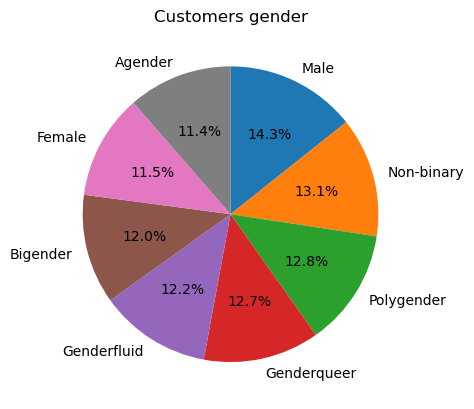

In [18]:
import matplotlib.pyplot as plt

labels = ['Male', 'Non-binary', 'Polygender', 'Genderqueer', 'Genderfluid', 'Bigender', 'Female', 'Agender']
points = [143, 131, 128, 127, 122, 120, 115, 114]

plt.title('Customers gender')
plt.pie(points, labels=labels, autopct='%.1f%%', counterclock=False, startangle=90)
plt.show()

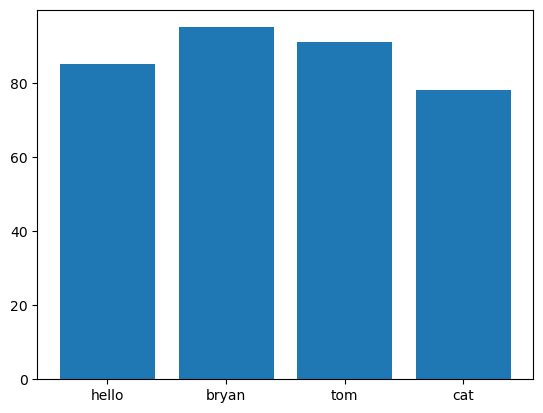

In [19]:
import numpy as np
import matplotlib.pyplot as plt

height = [85, 95, 91, 78]
bars = ('hello','bryan','tom','cat')
y_pos = np.arange(len(bars))

plt.bar(y_pos, height)

plt.xticks(y_pos, bars)

plt.show()

In [20]:
orders_data['order_year'] = orders_data['order_date'].dt.year

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
orders_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order_id       1000 non-null   int64 
 1   customer_id    1000 non-null   int64 
 2   payment        1000 non-null   int64 
 3   order_date     1000 non-null   object
 4   delivery_date  1000 non-null   object
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


In [ ]:
orders_data['order_date'] = pd.to_datetime(orders_data['order_date'],dayfirst=True) #dayfirst = True(기본값 - false) 미국식 순서(DD/MM/YYYY)로 인식하겠다(현재 MM/DD/YY 로 되어있기 때문)
orders_data.head()

C:\Users\tjsdh\AppData\Local\Temp\ipykernel_31136\3950391974.py:1: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  orders_data['order_date'] = pd.to_datetime(orders_data['order_date'],dayfirst=True) #dayfirst = True(기본값 - false) 미국식 순서(DD/MM/YYYY)로 인식하겠다(현재 MM/DD/YY 로 되어있기 때문)


,order_id,customer_id,payment,order_date,delivery_date
0,1,64,30811,2021-08-30,2021-09-24
1,2,473,50490,2021-02-03,2021-02-13
2,3,774,46763,2021-10-08,2021-11-03
3,4,433,39782,2021-05-06,2021-05-19
4,5,441,14719,2021-03-23,2021-03-24


In [ ]:
orders_data['order_year'] = orders_data['order_date'].dt.year

In [ ]:
cur.execute("select * from orders")

NameError: name 'cur' is not defined

In [ ]:
orders_data['order_month'] = orders_data['order_date'].dt.month

In [ ]:
orders_data['order_day'] = orders_data['order_date'].dt.day

In [ ]:
orders_data.head()

NameError: name 'orders_data' is not defined

In [ ]:
orders_data.head()

,order_id,customer_id,payment,order_date,delivery_date,order_year,order_month,order_day
0,1,64,30811,2021-08-30,2021-09-24,2021,8,30
1,2,473,50490,2021-02-03,2021-02-13,2021,2,3
2,3,774,46763,2021-10-08,2021-11-03,2021,10,8
3,4,433,39782,2021-05-06,2021-05-19,2021,5,6
4,5,441,14719,2021-03-23,2021-03-24,2021,3,23


In [ ]:
cur.execute('select order_month, count(order_month) from orders group by order_month order by order_month')

10

In [ ]:
result4 = cur.fetchall()

In [ ]:
cur.description

(('order_month', 3, None, 11, 11, 0, True),
 ('count(order_month)', 8, None, 21, 21, 0, False))

In [ ]:
# 컬럼 이름 가져오기
columns = [column[0] for column in cur.description]
columns

['count(order_month)']

In [ ]:
# DataFrame 생성
df = pd.DataFrame(result4, columns=columns)
# 인덱스 설정
df.set_index('count(order_month)', inplace=True)  # your_index_column은 실제 인덱스로 설정할 컬럼명으로 수정


In [ ]:
cur.execute('''select count(product_id) as `Total order quantity`
                    from sales_products sp
                    left join orders o on sp.order_id = o.order_id
                    where customer_id = 282
                    ''')

1

In [ ]:
vip_customer1 = cur.fetchall()
vip_customer1

((32,),)

In [ ]:
vip_customers_show1 = pd.DataFrame(vip_customer1)
vip_customers_show1[0]

0    32
Name: 0, dtype: int64

- 개별 고객(sales - product 테이블 join >> customer ID로 가장 많이 구매한 고객, 그 고객의 order id별 groupby해서 구매한 상품 확인)

## 상품분석

- 특정 기간 인기 판매 상품(orders - sales 테이블 join >> 기간 조회하여 가장 많이 판매된 상품 조회)

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,4) #(width,height)

In [ ]:
import seaborn

In [ ]:
import pandas
df = pandas.read_csv('customers.csv')

In [ ]:
gender_data = customer_data['gender'].value_counts()
gender_data



Male           143
Non-binary     131
Polygender     128
Genderqueer    127
Genderfluid    122
Bigender       120
Female         115
Agender        114
Name: gender, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

labels = ['Cake', 'Chocolate', 'Candy', 'Macaroon', 'Waffle']
values = [20, 35, 10, 50, 20]

plt.pie(values, labels=labels)
plt.show()

TypeError: pie() got an unexpected keyword argument 'wedgepropers'

In [ ]:
cur.execute('''select DISTINCT month(order_date) as order_month
                    from sales_products
                    order by order_month
                        ''')

10

In [ ]:
result5 = cur.fetchall()
result5

((1,), (2,), (3,), (4,), (5,), (6,), (7,), (8,), (9,), (10,))

In [ ]:
month_items = pd.DataFrame(result5)
month_items

,0
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [ ]:
month_options = month_items[0].tolist()
month_options

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
type(month_options[0])

int